# Signal and Systems Fall 1400
## Python Tutorial - Lcapy 


* Prepared by : Shayan Vassef
* Email : sh.vassef@ut.ac.ir

![Python](https://drive.google.com/uc?export=view&id=1Rhyh-TU_iUGeCvIHDrOjFZDLdMgAP5DZ)

In [ ]:
! pip install git+https://github.com/mph-/lcapy.git#egg=lcapy

  Cloning https://github.com/mph-/lcapy.git to /tmp/pip-install-tl5j4omj/lcapy_94390f570e9f4159a020aa59b8700dea
  Running command git clone -q https://github.com/mph-/lcapy.git /tmp/pip-install-tl5j4omj/lcapy_94390f570e9f4159a020aa59b8700dea


# Expression manipulation
## Second order system

In [ ]:
from lcapy import *
x = expr('A * exp(-alpha * t) * cos(omega_0 * t + theta)')

In [ ]:
list(x.symbols)

['theta', 'A', 'alpha', 't', 'omega_0']

In [ ]:
x1=x.expr
x1

In [ ]:
#x.partfrac().expr

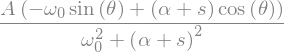

In [ ]:
X = x(s)
X.expr

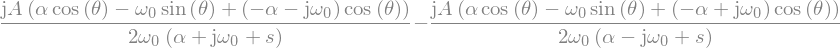

In [ ]:
X.partfrac().expr

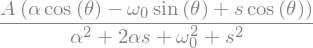

In [ ]:
X.partfrac().simplify().expr

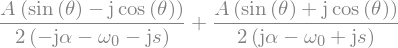

In [ ]:
X.partfrac().simplify_terms().expr

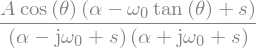

In [ ]:
X.ZPK().expr

# Laplace analysis of RC low-pass filter

In [ ]:
from lcapy import Circuit
a = Circuit("""
P1 1 0; down=1.5, v=v_i(t)
R 1 2 2; right=1.5
C 2 0_2 {1/4}; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down, v^=v_o(t)""")


![python](https://drive.google.com/uc?export=view&id=1G1XMX8iFDKa13Br5YQQz8_huF-Qt2_g7)

## 2 ways of creating transfer function

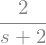

In [ ]:
H = a.transfer(1, 0, 3, 0)
H.expr

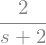

In [ ]:
H = a.P1.transfer('P2')
H.expr

## Initializing inpute voltage

In [ ]:
v_i = voltage(sin(3 *t) * u(t))

In [ ]:
v_i.expr

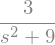

In [ ]:
V_i = v_i(s)
V_i.expr

## Finding the output response of the system

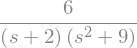

In [ ]:
V_o = V_i * H
V_o.expr

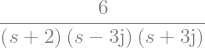

In [ ]:
V_o.ZPK().expr

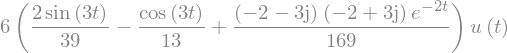

In [ ]:
v_o = V_o(t)
v_o.expr

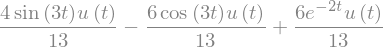

In [ ]:
v_o.simplify_terms().expr

## Plotting input vs output voltage in one plot

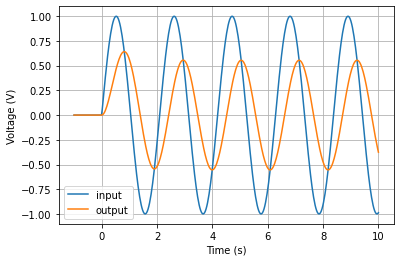

In [ ]:
ax = v_i.plot((-1, 10), label='input')
ax = v_o.plot((-1, 10), axes=ax, label='output')
ax.legend()

## Phase of the transfer function

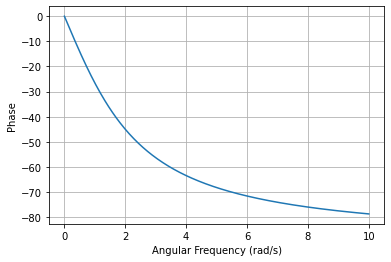

In [ ]:
H(jw).phase_degrees.plot((0, 10))

## Magnitude of the transfer function

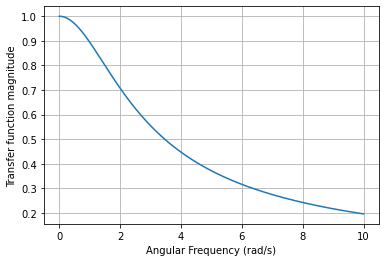

In [ ]:
H(jw).magnitude.plot((0, 10))

# **Laplace Transform**

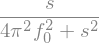

In [ ]:
f0 = symbol('f0')
cos(2 * pi * f0 * t).LT().expr

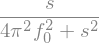

In [ ]:
f0 = symbol('f0')
cos(2 * pi * f0 * t)(s).expr

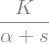

In [ ]:
H1 = 3 / (s + 2)
H1p, defs = H1.parameterize()
H1p.expr


In [ ]:
defs.expr

{'K': 3, 'alpha': 2}

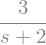

In [ ]:
H1p.subs(defs).expr

# **Inverse Laplace Transform**

In [ ]:
H = 1 / (s + 2)
H(t).expr

In [ ]:
H(t, causal=True).expr

In [ ]:
H(t, ac=True).expr

## Plotting zeros/poles

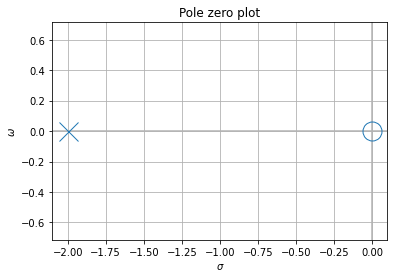

In [ ]:
H = s / (s + 2)
H.plot(xlabel=r'$\sigma$', ylabel=r'$\omega$', title='Pole zero plot')

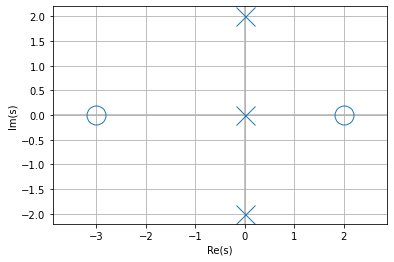

In [ ]:
from lcapy import s, j, transfer
from matplotlib.pyplot import savefig

H = transfer((s - 2) * (s + 3) / (s * (s - 2 * j) * (s + 2 * j)))
H.plot()

savefig('tf1-pole-zero-plot.png')

# **Network**

## Networks can be constructed using series and parallel combination of one-port network elements and other networks.
## The basic circuit components are two-terminal (one-port) devices are:
![Network](https://drive.google.com/uc?export=view&id=19ofhzZtcGzaAxSxOLz1yYX9wViVAPzFc)

In [ ]:
Z = impedance(4*s**2 + 3 * s + 1 / 6) / (s**2 + 2 * s / 3)
Z.network()
#Z.network().Z(s).canonical().expr

((C(25000000000000003
─────────────────
24999999999999999) + R(50000000000000000
─────────────────
25000000000000003)) | C(3)) + R(4)

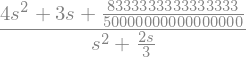

In [ ]:
Z.network().Z(s).canonical().expr

## Series R-C network

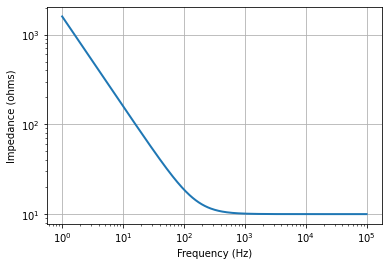

In [ ]:
from lcapy import *
from numpy import logspace
from matplotlib.pyplot import figure, savefig

N = R(10) + C(1e-4)

vf = logspace(0, 5, 400)
Z = N.Z(f).evaluate(vf)

fig = figure()
ax = fig.add_subplot(111)
ax.loglog(vf, abs(Z), linewidth=2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

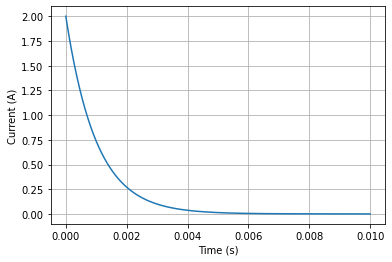

In [ ]:
from lcapy import *
from numpy import linspace
from matplotlib.pyplot import savefig

N = Vstep(20) + R(10) + C(1e-4, 0)

vt = linspace(0, 0.01, 1000)
N.Isc(t).plot(vt)

savefig('series-VRC1-isc.png')

## Parallel R-L-C network

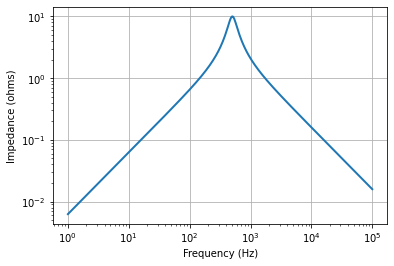

In [ ]:
from lcapy import *
from numpy import logspace
from matplotlib.pyplot import figure, savefig

N = R(10) | C(1e-4) | L(1e-3)

vf = logspace(0, 5, 400)
Z = N.Z(f).evaluate(vf)

fig = figure()
ax = fig.add_subplot(111)
ax.loglog(vf, abs(Z), linewidth=2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)


savefig('parallel-RLC3-Z.png')

## Using Circuit

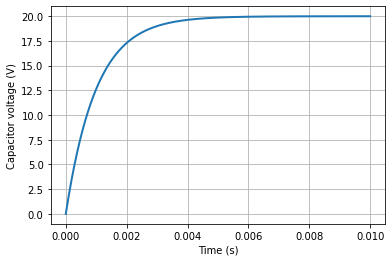

In [ ]:
from lcapy import Circuit

cct = Circuit("""
V 1 0 step 20
R 1 2 10
C 2 0 1e-4
""")

import numpy as np
t1 = np.linspace(0, 0.01, 1000)
vc = cct.C.v.evaluate(t1)# note the syntax

from matplotlib.pyplot import subplots, savefig
fig, ax = subplots(1)
ax.plot(t1, vc, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)')
ax.grid(True)

savefig('circuit-VRC1-vc.png')

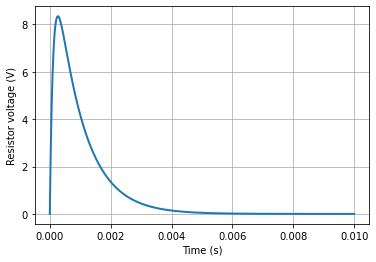

In [ ]:
from lcapy import Circuit
cct = Circuit("""
V 1 0 step 10; down
L 1 2 1e-3; right, size=1.2
C 2 3 1e-4; right, size=1.2
R 3 0_1 10; down
W 0 0_1; right
""")

import numpy as np
t1 = np.linspace(0, 0.01, 1000) # note the syntax
vr = cct.R.v.evaluate(t1)

from matplotlib.pyplot import subplots, savefig
fig, ax = subplots(1)
ax.plot(t1, vr, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Resistor voltage (V)')
ax.grid(True)

savefig('circuit-VRLC1-vr.png')

# Discrete-time signals

## There are a number of domain variables for discrete-time signals:
![image](https://drive.google.com/uc?export=view&id=1JGZlOSFO0h8x3xI4BUBa1W-Elg98aTQY)

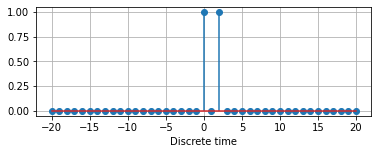

In [ ]:
from lcapy import n, delta
from matplotlib.pyplot import savefig

x = delta(n) + delta(n - 2)
x.plot(figsize=(6, 2))


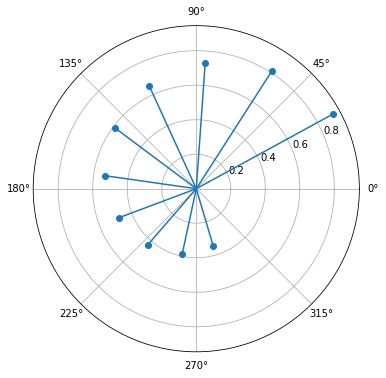

In [ ]:
from lcapy import j, n, exp
from matplotlib.pyplot import savefig

x = 0.9**n * exp(j * n * 0.5)
x.plot((1, 10), figsize=(6, 6), polar=True)


#  **Sequences**

In [ ]:
x = delta(n) + 2 * delta(n - 2)
my_seq = x.seq((-5, 5))
my_seq

{0, 0, 0, 0, 0, _1, 0, 2, 0, 0, 0}

##  indexes

In [ ]:
my_seq.n

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [ ]:
my_seq(0).expr

In [ ]:
my_seq.origin

5

## convert to an array

In [ ]:
my_seq.as_array()

array([0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0.])

In [ ]:
seq((pi, pi * 2)).evalf(3)

{_3.14, 6.28}

## sequence opertaions

In [ ]:
my_seq+my_seq

{_0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0}

In [ ]:
my_seq*2

{_0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0}

In [ ]:
seq((1, 2, 3)) + seq('{4, 5}')

{_1, 2, 3, 4, 5}

In [ ]:
seq(seq((1, 2, 3)).as_array() + seq('{4, _5, 6}').as_array())

{_5, 7, 9}

In [ ]:
my_seq >> 2

{0, 0, 0, _0, 0, 1, 0, 2, 0, 0, 0}

### sequence convolution

In [ ]:
seq((1, 2, 3)).convolve(seq((1, 1)))

{_1, 3, 5, 3}

### Z-transform on a sequence

In [ ]:
my_seq.ZT()

⎧                1      2          ⎫
⎪_0, 0, 0, 0, 0, ──, 0, ──, 0, 0, 0⎪
⎨                 5      7         ⎬
⎪                z      z          ⎪
⎩                                  ⎭

# **Z-domain expressions**

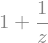

In [ ]:
(1 + 1 / z).expr

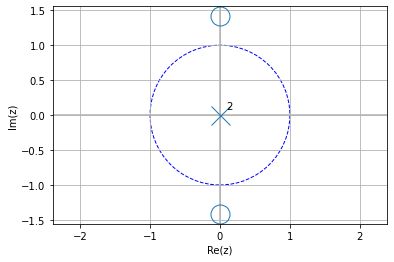

In [ ]:
from lcapy import delta
from lcapy.discretetime import n, z
from matplotlib.pyplot import savefig

x = delta(n) + 2*delta(n - 2)
X = x(z)
X.plot()

savefig('dt1-pole-zero-plot1.png')

## Lcapy implements a number of transforms for converting between different domains. The explicit methods are:
![transform](https://drive.google.com/uc?export=view&id=1NUiFMyaemBhh4-24xibgF7BFeJIMlTX2)

## Z-transform(ZT)

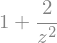

In [ ]:
(delta(n) + 2 * delta(n - 2)).ZT().expr

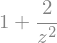

In [ ]:
(delta(n) + 2 * delta(n - 2))(z).expr

## Discrete Fourier

In [ ]:
(delta(n) + 2 * delta(n - 2)).DFT().expr

In [ ]:
(delta(n) + 2 * delta(n - 2))(k).expr

## Inverse Z-transform (IZT)

In [ ]:
H = z / (z - 'a')
H(n).expr

In [ ]:
H(n,causal=True).expr

## Discrete time Fourier transform (DTFT)

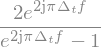

## Plotting

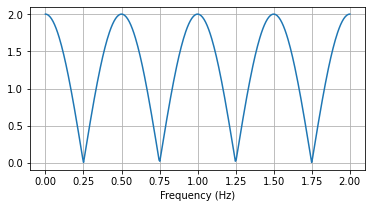

In [ ]:
from lcapy import delta
from lcapy.discretetime import n, dt
from matplotlib.pyplot import savefig

x = delta(n) + delta(n - 2)
abs(x.DTFT().subs(dt, 1)).plot( figsize=(6, 3))

savefig('dt1-DTFT-plot1.png', bbox_inches='tight')

## normalized frequency(F=f*$\Delta$t)

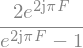

In [ ]:
sign(n).DTFT(F).expr

## normalized angular frequency($\Omega$=2*$\pi$*$\Delta$t)

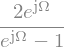

In [ ]:
sign(n).DTFT(Omega).expr

## Plotting 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f023c53cfd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f023bc81150>)

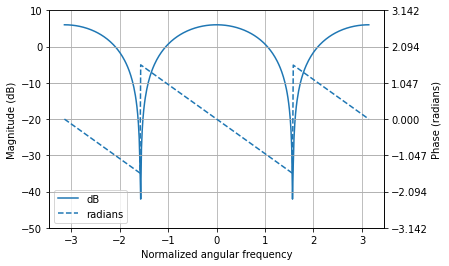

In [ ]:
x.DTFT(Omega).plot()

# **Discrete-time linear time invariant filters**

In [ ]:
a = symbol('a')
lpf = DLTIFilter((1 - a, ), (1, -a ))

In [ ]:
# For instance
# a = symbol('a')
# lpf = DLTIFilter((1 - a, a-2 , ), (1, -a , a+1, ))

In [ ]:
LPF=lpf.difference_equation()
LPF.expr

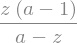

In [ ]:
LPF.transfer_function().expr

In [ ]:
LPF.transfer_function().IZT().expr

## response of the system

In [ ]:
x.expr

In [ ]:
lpf.response(x,ni=(0, 5))

⎧                    2                    ⎛ 2                ⎞   2 ⎛ 2        
⎨_1 - a, a⋅(1 - a), a ⋅(1 - a) - a + 1, a⋅⎝a ⋅(1 - a) - a + 1⎠, a ⋅⎝a ⋅(1 - a)
⎩                                                                             

        ⎞   3 ⎛ 2                ⎞⎫
 - a + 1⎠, a ⋅⎝a ⋅(1 - a) - a + 1⎠⎬
                                  ⎭

In [ ]:
x.seq().convolve(LPF.transfer_function().IZT().seq((0,5)))

⎧                       2                     3                         4     
⎨_1 - a, -a⋅(a - 1), - a ⋅(a - 1) - a + 1, - a ⋅(a - 1) - a⋅(a - 1), - a ⋅(a -
⎩                                                                             

       2             5            3            4            5        ⎫
 1) - a ⋅(a - 1), - a ⋅(a - 1) - a ⋅(a - 1), -a ⋅(a - 1), -a ⋅(a - 1)⎬
                                                                     ⎭

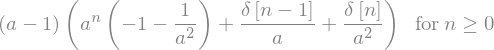

In [ ]:
(LPF.transfer_function()*x.ZT()).IZT().expr

## **discrete-time LTI filter**

In [ ]:
de = DifferenceEquation('2 * y(n)', '4 * y(n + 1) - 3 * y(n-3) -2 * x(n) - 5 * x(n-3)')
fil = de.dlti_filter()

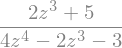

In [ ]:
de.transfer_function().expr

In [ ]:
fil.a

(1, -1/2, 0, 0, -3/4)

In [ ]:
fil.b

(0, 1/2, 0, 0, 5/4)

In [ ]:
fil.response(x,ni=(0, 3))

{_0, 1/2, 1/4, 5/8}

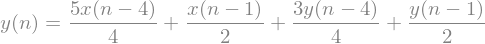

In [ ]:
fil.difference_equation().expr

# **difference_equation**

In [ ]:
H = (z**2 + 2) / z**2
H.difference_equation('x', 'y', 'iir').expr


In [ ]:
H = (z + 2) / z**2
H.difference_equation('x', 'y', 'fir').expr

In [ ]:
difference_equation('y(n)+3*x(n-3)', '2 * x(n - 2) + x(n - 1)').expr

In [ ]:
de=difference_equation('y(n)+3*x(n-3)', '2 * x(n - 2) + x(n - 1)')
de.separate().expr

In [ ]:
de = difference_equation('y(n)', '2 * x(n - 2) + x(n - 1)', )
H = de.transfer_function()
H.expr

TypeError: ignored